<a href="https://colab.research.google.com/github/johnpharmd/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

# Load the data as pd df
brca_surv_post_surg_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
brca_surv_post_surg = pd.read_csv(brca_surv_post_surg_url, header=None)

In [0]:
# Check for appropriate number of obs
print(brca_surv_post_surg.shape)

# Check for missing values
print(brca_surv_post_surg.isnull().sum().sum())
print(brca_surv_post_surg.isna().sum().sum())

# Rename df columns
df = brca_surv_post_surg.rename(columns={0: 'age', 1: 'op_year', 2: 'pos_node_count', 3: 'survival_status'})

# Change code for survival <= 5 years from '2' to '0'
df.survival_status.replace(2, 0, inplace=True)

df.head()


(306, 4)
0
0


,age,op_year,pos_node_count,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [82]:
# Create pd crosstabulation of survival status vs. age
surv_vs_age = pd.crosstab(df['age'], df['survival_status'])
surv_vs_age

survival_status,0,1
age,,
30,0,3
31,0,2
33,0,2
34,2,5
35,0,2
36,0,2
37,0,6
38,1,9
39,1,5


In [83]:
# Create pd crosstab of survival status vs. positive node count
surv_vs_pos_nodes = pd.crosstab(df['pos_node_count'], df['survival_status'])
surv_vs_pos_nodes

survival_status,0,1
pos_node_count,,
0,19,117
1,8,33
2,5,15
3,7,13
4,3,10
5,4,2
6,3,4
7,2,5
8,2,5


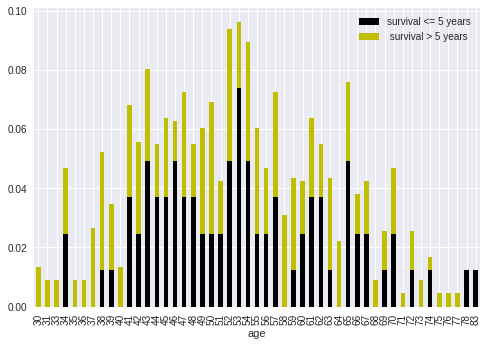

In [0]:
import matplotlib.pyplot as plt

# Plot survival status in 2 bins, versus age

# Make bins
survival_bins = pd.cut(df['survival_status'], 2)

# Make pd crosstab and plot as bar chart
ax = pd.crosstab(df['age'], survival_bins,
                 normalize='columns').plot(kind='bar', stacked = True, color=('k', 'y'))
ax.legend(['survival <= 5 years', ' survival > 5 years']);


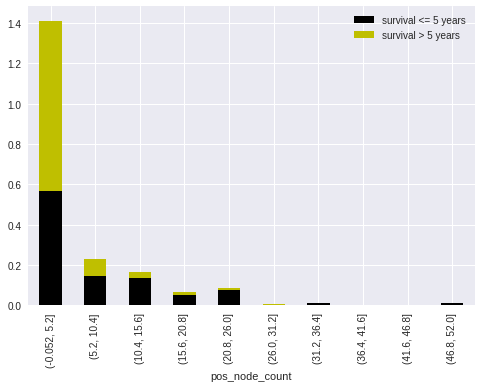

In [0]:
# Plot survival status in 2 bins, versus positive node count in 10 bins

# Make bins
survival_bins = pd.cut(df['survival_status'], 2)
pos_node_bins = pd.cut(df['pos_node_count'], 10)

# Make pd crosstab and plot as bar chart
ax = pd.crosstab(pos_node_bins, survival_bins,
                 normalize='columns').plot(kind='bar', stacked = True, color=('k', 'y'))
ax.legend(['survival <= 5 years', 'survival > 5 years']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
A: Age younger than 41 years appears to have a positive correlation with survival.

- What is at least one feature that looks to have a negative correlation with survival?
A: Number of positive nodes found and removed by surgeon appears to be negatively correlated with survival.

- How are those two features related with each other, and what might that mean? A: Please see code below.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

slope, intercept, and r_value: -0.0420434386501682 6.231638160825163 -0.06317610238980059


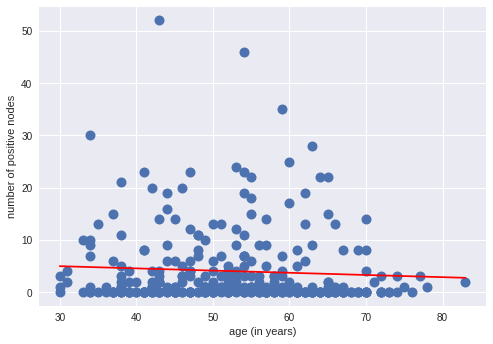

'\nThe intercept of the regression line is at 6 nodes, which seems unlikely because\nthis would be saying that a female baby younger than 12 months could have six\ncancerous nodes.\nBut the slope and r value are both nearly zero. Thus, there appears to be no\nrelationship between age and positive node count.\n'

In [0]:
import scipy

# Plot scatter of positive node count versus age
fig, ax = plt.subplots()
plt.scatter(df['age'], df['pos_node_count'])

# Plot line of best fit

# Data
x = df['age']
y = df['pos_node_count']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope, intercept, and r_value:', slope, intercept, r_value)

# Plot line of best fit
ax.set_xlabel('age (in years)')
ax.set_ylabel('number of positive nodes')
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, slope*x + intercept, 'r', label='Fitted line')

plt.show()

# Comments
'''
The intercept of the regression line is at 6 nodes, which seems unlikely because
this would be saying that a female baby younger than 12 months could have six
cancerous nodes.
But the slope and r value are both nearly zero. Thus, there appears to be no
relationship between age and positive node count.

Moreover, in order to predict survival from this data, one must consider both
age and positive node count, at a minimum.
''' 